# Week 8 Problem 1

A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says YOUR CODE HERE. Do not write your answer in anywhere else other than where it says YOUR CODE HERE. Anything you write anywhere else will be removed or overwritten by the autograder.

2. Before you submit your assignment, make sure everything runs as expected. Go to menubar, select Kernel, and restart the kernel and run all cells (Restart & Run all).

3. Do not change the title (i.e. file name) of this notebook.

4. Make sure that you save your work (in the menubar, select File → Save and CheckPoint)

5. When you are ready to submit your assignment, go to Dashboard → Assignments and click the Submit button. Your work is not submitted until you click Submit.

6. You are allowed to submit an assignment multiple times, but only the most recent submission will be graded.

7. If your code does not pass the unit tests, it will not pass the autograder.



## Author: Apurv Garg
### Primary Reviewer: John Nguyen


# Due Date: 6 PM, March 12, 2018


In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from numpy.testing import assert_array_equal, assert_array_almost_equal
from pandas.util.testing import assert_frame_equal, assert_index_equal
from nose.tools import assert_false, assert_equal, assert_almost_equal, assert_true, assert_in, assert_is_not

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

# Set global figure properties
import matplotlib as mpl
mpl.rcParams.update({'axes.titlesize' : 20,
                     'axes.labelsize' : 18,
                     'legend.fontsize': 16})

# Set default Seaborn plotting style
sns.set_style('white')

def hist_oned(x, xlbl, axs):
    bins=np.linspace(np.min(x), np.max(x), 25)
    axs.hist(x, bins=bins, 
             color=sns.xkcd_rgb['denim blue'], alpha=0.25, 
             label='Raw Data')
    axs.legend(loc='best')
    axs.set_xlabel(xlbl)
    sns.despine(offset=10)


## Data Generation

The data generated in the codecell below will be used across the Notebook. There are 2 numpy arrays x and y each containing 250 elements. These 2 datasets follows Normal Distribution and also contains a few outliers.

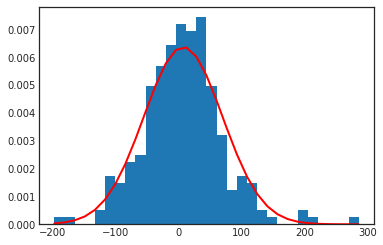

In [2]:
np.random.seed(100)
y=np.random.normal(100,50,size=200)
y = np.append(y,np.random.normal(200,100,size=50))
np.random.seed(1234)
x=np.random.normal(0,50,size=200)
x = np.append(x,np.random.normal(10,100,size=50))
mu = np.mean(x); sigma = np.std(x)
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(x, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *\
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),\
          linewidth=2, color='r')
plt.show()

# Problem 1

Create a function that takes the dataset(1D numpy array) as input and calculate mean, median, two-sigma and three-sigma errors(using trimmed statistics i.e. trimmed mean and std. deviation) and 5th and 95th percentile for the data.

    

In [3]:
def trim(data):
    '''      
    Create a function that takes the dataset(1D numpy array) as input and calculate mean, median, two-sigma 
    and three-sigma errors(using trimmed statistics i.e. trimmed mean and std. deviation) and 5th and 95th 
    percentile for the data.
    
    Parameters
    ----------
    data : numpy array containing data
    
    Returns
    -------
    a tuple of 5 containing: 
    - mean
    - std. deviation
    - a list of length 2 containing two-sigma errors
    - a list of length 2 containing three-sigma errors
    - a numpy array of length 2 containing the 5th and 95th perentile values
    '''

    # Compute and display statistics of data
    mu = np.mean(data); sig = np.std(data)
    
    # Compute trimmed statistics
    Trim_Mean = stats.tmean(data, (mu - sig, mu + sig))
    Trim_Std = stats.tstd(data, (mu - sig, mu + sig))
    
    # Compute and display two-sigma errors
    two_sig = [(Trim_Mean - 2.0 * Trim_Std), (Trim_Mean + 2.0 * Trim_Std)]    
    
    # Compute and display three-sigma errors
    three_sig = [(Trim_Mean - 3.0 * Trim_Std), (Trim_Mean + 3.0 * Trim_Std)] 
    
    # Compute the 5th and 95th percentile values
    percen = np.array([np.percentile(data, 5), np.percentile(data, 95)])
    
    return (mu, sig, two_sig, three_sig, percen)

In [4]:
mu,sigma,sigma2,sigma3,percentile = trim(x)
mu_n,sigma_n,sigma2_n,sigma3_n,percentile_n = trim(y)
assert_equal(isinstance(sigma2, list), True)
assert_equal(isinstance(sigma3, list), True)
assert_equal(isinstance(percentile, np.ndarray), True)
assert_almost_equal(mu, 7.168494, 2)
assert_almost_equal(sigma, 62.669735, 2)
assert_almost_equal(sigma2[0], -57.615075, 2)
assert_almost_equal(sigma2[1], 75.0473696, 2)
assert_almost_equal(sigma3[0], -90.7806872, 2)
assert_almost_equal(sigma3[1], 108.2129810, 2)
assert_almost_equal(percentile[0], -90.89183, 2)
assert_almost_equal(percentile[1], 109.130367, 2)
assert_equal(isinstance(sigma2_n, list), True)
assert_equal(isinstance(sigma3_n, list), True)
assert_equal(isinstance(percentile_n, np.ndarray), True)
assert_almost_equal(mu_n, 117.7352754, 2)
assert_almost_equal(sigma_n,  78.4066435, 2)
assert_almost_equal(sigma2_n[0], 30.662318, 2)
assert_almost_equal(sigma2_n[1], 188.821267, 2)
assert_almost_equal(sigma3_n[0], -8.877419, 2)
assert_almost_equal(sigma3_n[1], 228.3610042, 2)
assert_almost_equal(percentile_n[0], 18.7174252, 2)
assert_almost_equal(percentile_n[1], 265.81920703, 2)

# Problem 2


For this Problem, complete the function plot1D creating a plot to visualize one-dimensional distribution of the data.
We over-plot on this figure the two-sigma and three-sigma errors, as computed from the trimmed mean and standard deviation. The function will take **condition** as parameter: which is a character representing the data to be used for displaying the distribution.<br>
If **condition=='x'**, then use the data in x, two-sigma and three-sigma values of x for plotting and name the x-axis as 'x'.<br>
If **condition=='y'**, then use the data in y, two-sigma and three-sigma values of y for plotting and name the y-axis as 'y'.<br>

**HINT1:** Use the values for two-sigma and three-sigma generated from Problem1.<br>
**HINT2:** You can use the hist_oned function created above with parameters eval(condition), condition and axes object after creating the vlines representing two-sigma and three-sigma errors.

The following is expected in the function: <br>
Creating a figure and axes object using subplots from matplotlib.<br>
Create vlines for two-sigma and three-sigma errors.
Label the x-axis of your plot same as the parameter value.<br>
Set a title for your plot.<br>
Return the axes object, list of two-sigma values used and list of three-sigma vlaues used.<br>

If done correctly your plot should look *similar* to the graphs below:

x | y
- | - 
![Imgur](https://i.imgur.com/LyS0orY.png) | ![Imgur](https://i.imgur.com/DECO0vL.png)

In [5]:
def plot1D(condition):
    '''          
    Parameters
    ----------
    condition : A character either 'x' or 'y' implying that we need to plot the distribution of x or y numpy array 
    respectively.
    
    Returns
    -------
    A tuple of 3 containing the axes object, list of two-sigma values used and list of three-sigma vlaues used.
    '''
    # YOUR CODE HERE
    
    if condition == 'x':
        data = x
    else:
        data = y
    
    mu,sigma,sigma2,sigma3,percentile = trim(data)
    
    # Plot data with trimmed statistics
    fig, axs = plt.subplots(figsize=(6, 6))
    
    axs.vlines(sigma2, ymax = 20, ymin = 1, linestyle='-', \
           lw=2, alpha = 0.75, label='2$\sigma$')
    
    axs.vlines(sigma3, ymax = 15, ymin = 1, linestyle='--',\
           lw=2, alpha = 0.75, label='3$\sigma$')
    
    # Generate figure of data and outliers
    hist_oned(data, condition, axs)

    axs.legend(loc='best')
    axs.set(title=f'Distribution')
    
    return (axs, sigma2, sigma3)

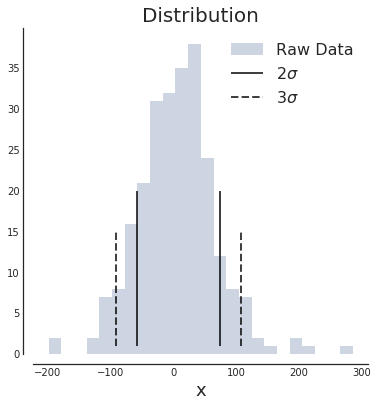

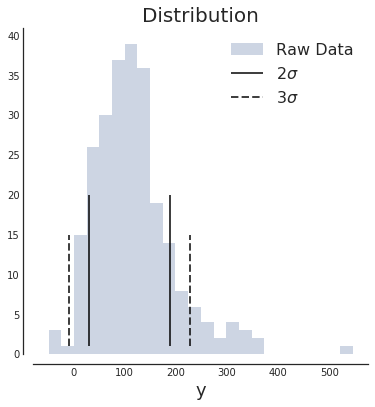

In [6]:
plt_x, s12, s13=plot1D('x')
plt_y, s22, s23=plot1D('y')
assert_true(isinstance(plt_y, mpl.axes._subplots.Axes), msg='return an axes object')
assert_true(isinstance(plt_x, mpl.axes._subplots.Axes), msg='return an axes object')
assert_false(plt_x.get_title() == '', msg='Set Your title')
assert_false(plt_y.get_title() == '', msg='Set Your title')
assert_true(plt_y.get_xlabel() == 'y', msg='Label the x-axis as y')
assert_true(plt_x.get_xlabel() == 'x', msg='Label the x-axis as x')
assert_true(s12 == sigma2)
assert_true(s23 == sigma3_n)
assert_true(s22 == sigma2_n)
assert_true(s13 == sigma3)
assert_almost_equal(s12[0], -57.615075, 2)
assert_almost_equal(s12[1], 75.0473696, 2)
assert_almost_equal(s22[0], 30.6623180, 2)
assert_almost_equal(s22[1], 188.821267, 2)

# Problem 3

For this Problem, complete the function plot2D creating a scatter plot to visualize the bivariate distribution of x and y, which visually indicates the normally-distributed data. 
The function will take **x** and **y** as parameter: which will represent x and y axis seperately.<br>
Create 2 numpy arrays which will be a subset of original array y:<br>
**ay:** should contain the values in y in range sigma3_n[0] to sigma3_n[1]. *Range:* **(sigma3_n[0],sigma3_n[1])**<br>
**by:** should contain the values of y in range less than equal to sigma3_n[0] and greater than equal to sigma3_n[1].
*Range:* **(-Inf,sigma3_n[0]] , [sigma3_n[1],Inf)**<br>

We will be using the values in **by** to use it as Noise in the graph.

**HINT1:** Use the values for three-sigma values for y generated from Problem1.<br>
**HINT2:** To create scatter plot in 2 different colors, the length of x and y passed in scatter() should be same. Therefore, you will have to subset **x** based on length of **ay** and **by** for normal data and outliers respectively.

The following is expected in the function: <br>
Creating two numpy arrays **ay** and **by**.<br>
Creating a figure and axes object using subplots from matplotlib.<br>
Create scatter plot with 2 different colors representing normal data and outliers.<br>
Set a title for your plot.<br>
Label the x-axis and y-axis of your plot as 'x' and 'y' respectively.<br>
Return the axes object, numpy arrays ay and by which are subset of original y based on the condition described above.<br>

If done correctly your plot should look *similar* to the graph below:


<img src="https://i.imgur.com/ma8owGZ.png" width="350" height="350" align="left"/>


In [7]:
def plot2D(x, y):
    '''       
    Create 2 numpy arrays which will be a subset of original array y:<br>
    **ay**: should contain the values in y in range sigma3_n[0] to sigma3_n[1]. 
    Range: (sigma3_n[0],sigma3_n[1])
    **by**: should contain the values of y in range less than equal to sigma3_n[0] and greater than equal to sigma3_n[1].
    Range: (-Inf,sigma3_n[0]] , [sigma3_n[1],Inf)
    
    Parameters
    ----------
    x : x axis(numpy array containing 250 elements)
    y : y axis(numpy array containing 250 elements)
    
    Returns
    -------
    A tuple of 3 containing the axes object(axs), numpy arrays ay and by.
    '''
    # YOUR CODE HERE  
    a = (sigma3_n[0] < y) & (sigma3_n[1] > y)
    ay = y[a]
    b = [a == False]
    by = y[b]
    
    # Plot two-dimensional data distributions
    fig, axs = plt.subplots(figsize=(8, 8))
   
    # Plot normal data in blue
    plt.scatter(x[:len(ay)], ay, 
                color=sns.xkcd_rgb['denim blue'], s=60, alpha=0.75, label='Raw Data')
             
    # Plot extreme outliers in green
    plt.scatter(x[len(ay):], by, 
                color=sns.xkcd_rgb['medium green'], s=60, alpha=0.75, label='High Noise')
    
    axs.legend(loc=4)
    axs.set_xlabel('x')
    axs.set_ylabel('y')
    axs.set_title("Outliers")
    sns.despine(offset=10, trim=True)
    
    return axs, ay, by


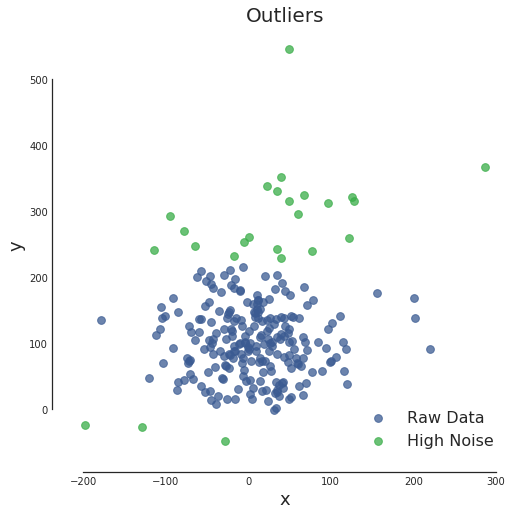

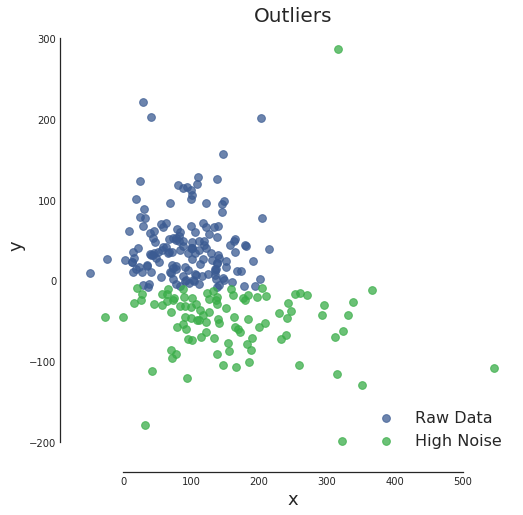

In [8]:
plot, val1, val2=plot2D(x, y)
assert_true(isinstance(plot, mpl.axes._subplots.Axes), msg='return an axes object')
assert_false(plot.get_title() == '', msg='Set Your title')
assert_true(plot.get_xlabel() == 'x', msg='Label the x axis as x')
assert_true(plot.get_ylabel() == 'y', msg='Label the y axis as y')
assert_equal(isinstance(val1, np.ndarray), True)
assert_equal(isinstance(val2, np.ndarray), True)
assert_equal(len(val1), 225)
assert_equal(len(val2), len(y)-len(val1))
assert_almost_equal(min(val1), -0.759435,2)
assert_almost_equal(min(val2), -48.6657737,2)
assert_almost_equal(max(val2), 546.5227148,2)
assert_almost_equal(max(val1), 214.9326970,2)
assert_equal(len(val2), 25)
plot_r, val1_r, val2_r=plot2D(y, x)
assert_equal(isinstance(val1_r, np.ndarray), True)
assert_equal(isinstance(val2_r, np.ndarray), True)
assert_equal(len(val2_r), len(x)-len(val1_r))